### 纲要
- 工具：利用 Python, Pandas, Matploblib
- 如何计算移动平均线：每八年计算一次平均值，若不足八年则以 4 年开始平均。
- 决定如何将趋势可视化的关键：在观察线图在非移动平均值时波动过于大，因此打算使用移动平均值来观察趋势。

### 查询的 SQL 语句
- 查询城市列表: SELECT * FROM city_list;
- 查询城市温度数据: SELECT * FROM city_data WHERE city='Shanghai' AND country='China';
- 查询全球温度数据: SELECT * FROM global_data;

In [1]:
import pandas as pd
df_city = pd.read_csv('city_data.csv')
df_city.head()

,year,city,country,avg_temp
0,1841,Shanghai,China,14.87
1,1842,Shanghai,China,15.43
2,1843,Shanghai,China,15.53
3,1844,Shanghai,China,15.33
4,1845,Shanghai,China,15.43


In [2]:
df_city.describe()

,year,avg_temp
count,173.000000,173.000000
mean,1927.000000,15.973237
std,50.084928,0.575494
min,1841.000000,14.470000
25%,1884.000000,15.600000
50%,1927.000000,15.930000
75%,1970.000000,16.230000
max,2013.000000,17.860000


In [3]:
df_global = pd.read_csv('global_data.csv')
df_global.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
df_global.describe()

,year,avg_temp
count,266.000000,266.000000
mean,1882.500000,8.369474
std,76.931788,0.584747
min,1750.000000,5.780000
25%,1816.250000,8.082500
50%,1882.500000,8.375000
75%,1948.750000,8.707500
max,2015.000000,9.830000


In [5]:
import matplotlib.pyplot as plt

def temperature_year_comparison_visualization(X_1, X_2, Y_1, Y_2, label_name_1, label_name_2, title):
    plt.plot(X_1, Y_1, label=label_name_1, color='orange')
    plt.plot(X_2, Y_2, label=label_name_2, color='magenta')
    plt.legend(loc='upper left')
    plt.title('{}, {} {} comparison'.format(label_name_1, label_name_2, title))
    plt.xlabel('Year(AD)')
    plt.ylabel('Temp(℃)')
    plt.show()

### 线图观察
- 首先，在 1841 ~ 2013 年间全球和上海的温度的趋势都是呈现上升曲线。
- 发现上海的温度比全球的平均温度高了大约 7 度。
- 线图如果是在非移动平均值时，观察到的上海温度上升趋势跟全球相比不是太明显，因此考虑使用移动平均值在观察上升曲线。
- 在以下的移动平均值线图中，可以清晰看见不论是全球或是上海的温度，在 1841 ~ 2013 年间都是稳定上升的，然后也是可以明显看出每个平均都是高了7度左右。

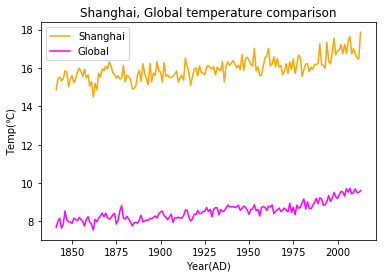

In [6]:
# for aligning city_data because of inconsistant data length
df_global = df_global[91:-2] 

temperature_year_comparison_visualization(df_city.year, df_global.year, df_city.avg_temp, df_global.avg_temp, 'Shanghai', 'Global', 'temperature')

In [7]:
rolling_mean_city = df_city.avg_temp.rolling(window=8, center=True, min_periods=4).mean()
rolling_mean_global = df_global.avg_temp.rolling(window=8, center=True, min_periods=4).mean()

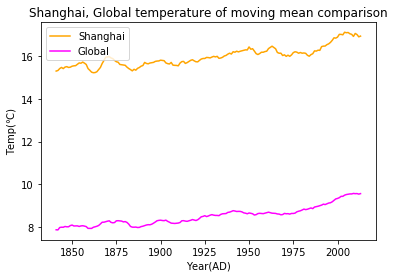

In [8]:
temperature_year_comparison_visualization(df_city.year, df_global.year, rolling_mean_city, rolling_mean_global, 'Shanghai', 'Global', 'temperature of moving mean')

### Reference
- Udacity tutorial materials
- Pandas official website for rolling api: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
- Moving mean data visualization: https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d

##### Author： Wei-Chung Chen